<a href="https://colab.research.google.com/github/itspopoy57/Machinelearning/blob/main/01_neural_network_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Regression problems


## intro to regression

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

##Create data to view and fit


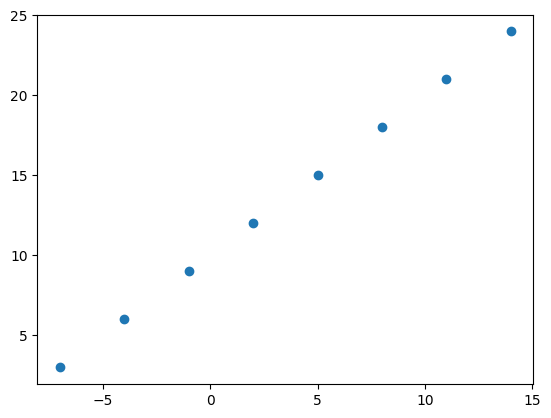

In [2]:
import numpy as np
import matplotlib.pyplot as plt


#create the features
#capital variables when making the matrix or tensor
X = np.array([-7.0, -4.0 , -1.0 , 2.0, 5.0, 8.0, 11.0, 14.0 ])

#creating the labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0,])

#visualize it
plt.scatter(X,y)

In [3]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
y.shape , X.shape

((8,), (8,))

##Input Output shapes

lets create a demo tensor for our housing prediction prolbem

In [5]:
house_info = tf.constant(["bedroom" , "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
#turn all our numpy array to tensors

X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X.ndim, y.ndim, X.shape, y.shape

(1, 1, TensorShape([8]), TensorShape([8]))

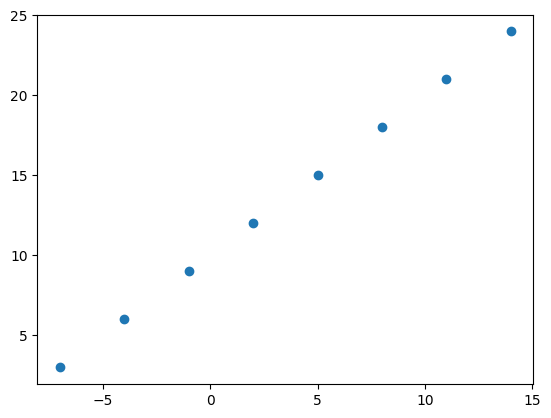

In [8]:
plt.scatter(X, y)

##Steps on Modeling on tensorFlow

here
1. **Creating a Model** - Define the input and output Layers, as well as
    Hidden layers of a deep learning model
2.** Compile the model**
  - define the loss function ( the function that tell use how wrong it is) and the Optimizer (tells our model how to improve and patters our samples / Model) and Evaluation metrics ( to interpret the performance of our model)

3. **Fitting a Model **- letting the models find patters between X & y
  or Features and labels.



In [9]:
from keras.engine.sequential import Sequential
from keras.api._v2 import keras
#set random Seed
tf.random.set_seed(42)

# 1 create model using sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    #we put one because we want to get to predict 1 number and return 1 number
    #or input one number then predict one number
])

#or you can do it like this
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

# 2. Compile
model.compile(loss=tf.keras.losses.mae, #mae is mean absolute error
              optimizer=tf.keras.optimizers.SGD(), #STG is short for stochastic gradient descent
              metrics=["mae"])


# 3. Fit the model for 5 laps
    #model.fit(X, y , epochs=5) - have to change this because of the update 2.7+
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 5)


Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 7.5805 - mae: 7.5805
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/5
1/1 [==============================] - 0s 25ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/5
1/1 [==============================] - 0s 26ms/step - loss: 7.4812 - mae: 7.4812
Epoch 5/5
1/1 [==============================] - 0s 24ms/step - loss: 7.4756 - mae: 7.4756


In [10]:
#check X, y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
#try to make a prediction using our trained model
# the input is X we  predicting y so the 17 is X
y_pred  = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 195ms/step


array([[29.38685]], dtype=float32)

now that is wrong lol


##Now we have to know how to improve the model

1. we can improve our model by altering the steps we tppk
to create a  model.

    - increase the the number of the hiddenlayers change the
      activation fuction of each layer
    -
2. compiling a model
    - we might change the optimization function or perhaps the learning rate

3. fitting a model
    - epochs -- leave it training for longer

In [20]:
from keras.engine.training import optimizer
from keras.engine.sequential import Sequential
from keras.api._v2 import keras

# redoing it here

#Step 1 :

modelp2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#step 2:
modelp2.compile(loss=tf.keras.losses.mae,
                #optimizer=tf.keras.optimizers.SGD(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["mae"])

#step 3
  #x = input , y = output , epoch
modelp2.fit(tf.expand_dims(X, axis=-1), y, epochs=500)



Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 12.9810 - mae: 12.9810
Epoch 2/500
1/1 [==============================] - 0s 18ms/step - loss: 11.2802 - mae: 11.2802
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 9.5037 - mae: 9.5037
Epoch 4/500
1/1 [==============================] - 0s 11ms/step - loss: 7.5961 - mae: 7.5961
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 8.2426 - mae: 8.2426
Epoch 6/500
1/1 [==============================] - 0s 12ms/step - loss: 9.6003 - mae: 9.6003
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 9.4480 - mae: 9.4480
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 8.5386 - mae: 8.5386
Epoch 9/500
1/1 [==============================] - 0s 12ms/step - loss: 7.6104 - mae: 7.6104
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 7.1894 - mae: 7.1894
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - 

In [13]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
y_pred123 = modelp2.predict([17.0])
y_pred123

1/1 [==============================] - 0s 132ms/step


array([[26.422058]], dtype=float32)

##typical work flow with neural networks

make the model -> fit it -> evaluate it
-> twick it -> fit it -> evaluate it -> twick that model
-> fit it -> evalua...

for evaluations of model --> visualize , visualize, VISUALIZE!

In [21]:
#making a bigger dataset

X = tf.range(-100,100 , 4)
#-100 to 100 by 4
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [22]:
#make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

(<matplotlib.collections.PathCollection at 0x785f3ad36050>,
 [<matplotlib.lines.Line2D at 0x785f3ad35570>])

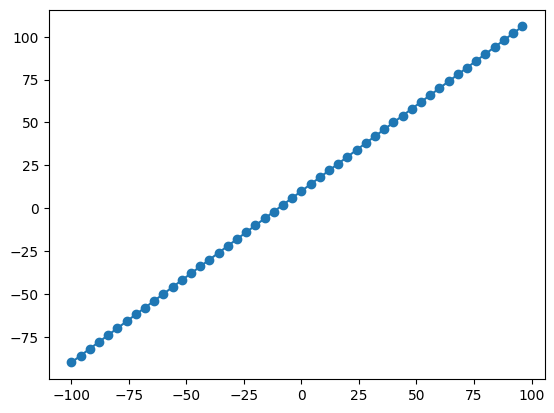

In [24]:
plt.scatter(X,y)

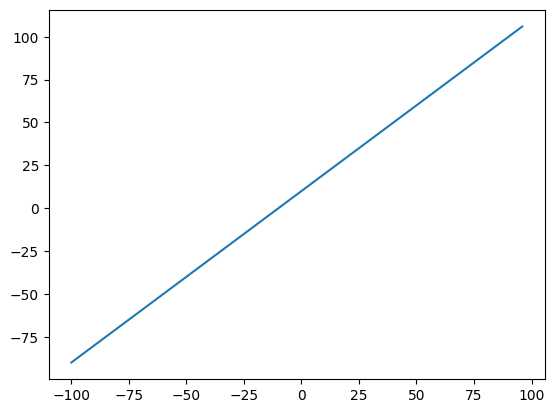

In [25]:
plt.plot(X,y)

##concepts of 3 sets

1.   you can start here again



split X and y to 80 percent training set 10-15 percent validation set
then 5 percent test set